WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#openweathermap url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities[0])

597


Retrieve weather data for 500 randomly selected cities
Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).

Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [3]:
# Build query URL and request your results in Celsius
temperature = []
humidity = []
cloudiness =[]
wind = []

cities_weather_data = pd.DataFrame()

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_data = pd.Series({"name": city, 
                               "temp":weather_json['main']['temp'],
                               "max_temp":weather_json['main']['temp_max'],
                               "humidity":weather_json['main']['humidity'],
                               "cloudiness":weather_json['clouds']['all'],
                               "wind":weather_json['wind']['speed'],
                               "lat":weather_json['coord']['lat'],
                               "lon":weather_json['coord']['lon'],
                               "cityid":weather_json['id'],
                               "country":weather_json['sys']['country'],
                               "date_time":weather_json['dt']
                              })
        cities_weather_data = cities_weather_data.append(city_data,ignore_index=True)
        print(f"Weather recorded for {city} ({weather_json['id']})")
        
    except KeyError:
        print(f"Weather fact not recorded for {city}, skipping")
        
print(f"Total cities with data recorded: {len(cities_weather_data)}")
print(cities_weather_data)
cities_weather_data.to_csv("Output/city_weather_data.csv", index=False, header=True)

Weather recorded for airai (1651810)
Weather recorded for kieta (2094027)
Weather recorded for mehran (124291)
Weather recorded for hailar (2037078)
Weather recorded for mataura (6201424)
Weather recorded for kodiak (5866583)
Weather recorded for caravelas (3466980)
Weather recorded for sisimiut (3419842)
Weather recorded for meulaboh (1214488)
Weather recorded for poum (2138555)
Weather fact not recorded for uwayl, skipping
Weather recorded for khatanga (2022572)
Weather recorded for komsomolskiy (1513491)
Weather recorded for rikitea (4030556)
Weather recorded for havoysund (779622)
Weather recorded for petropavlovsk-kamchatskiy (2122104)
Weather recorded for wiarton (6186122)
Weather fact not recorded for ondorhaan, skipping
Weather recorded for ushuaia (3833367)
Weather fact not recorded for umm jarr, skipping
Weather recorded for bluff (2206939)
Weather fact not recorded for ruatoria, skipping
Weather recorded for tapiramuta (3446866)
Weather recorded for codrington (2171099)
Weat

Weather recorded for toora-khem (1489401)
Weather fact not recorded for sansai, skipping
Weather recorded for walvis bay (3359638)
Weather recorded for mount gambier (2156643)
Weather recorded for wewak (2083537)
Weather recorded for bubaque (2374583)
Weather recorded for souillac (933995)
Weather recorded for severo-kurilsk (2121385)
Weather recorded for vila franca do campo (3372472)
Weather recorded for quatre cocos (1106643)
Weather recorded for riyadh (108410)
Weather recorded for coffs harbour (2171085)
Weather recorded for galle (1246294)
Weather recorded for kushima (1895695)
Weather recorded for vao (2137773)
Weather recorded for lexington park (4360592)
Weather recorded for georgetown (1735106)
Weather recorded for bereda (3105522)
Weather recorded for salinopolis (3389822)
Weather recorded for ancud (3899695)
Weather recorded for fortuna (5563839)
Weather recorded for anadyr (2127202)
Weather recorded for grand forks (5059430)
Weather recorded for broome (5110365)
Weather re

Weather recorded for temple (4735966)
Weather recorded for bonthe (2409914)
Weather recorded for sioux lookout (6148373)
Weather recorded for huaquechula (3527006)
Weather recorded for spirit river (6153766)
Weather recorded for khandyga (2022773)
Weather recorded for alofi (4036284)
Weather recorded for aklavik (5882953)
Weather recorded for salta (3838233)
Weather recorded for orleans (4336191)
Weather recorded for poya (2138522)
Weather fact not recorded for tsihombe, skipping
Weather recorded for kenai (5866063)
Weather recorded for auki (2109701)
Weather fact not recorded for samusu, skipping
Weather recorded for garden city (4993659)
Weather recorded for karasburg (3356343)
Weather recorded for hovd (1516048)
Weather recorded for rundu (3353383)
Weather recorded for douglas (5067114)
Weather recorded for nueva gerona (3545867)
Weather recorded for severnoye (1492607)
Weather recorded for constantine (2501152)
Weather recorded for vila velha (3445026)
Weather recorded for mumford 

Inspect the data and remove the cities where the humidity > 100%.

In [4]:
cities_weather_data_filtered = cities_weather_data[cities_weather_data['humidity'] <=100] 
len(cities_weather_data_filtered)
cities_weather_data_filtered.head()

,cityid,cloudiness,country,date_time,humidity,lat,lon,max_temp,name,temp,wind
0,1651810.0,100.0,TL,1.607302e+09,87.0,-8.93,125.41,21.33,airai,21.33,0.85
1,2094027.0,56.0,PG,1.607302e+09,66.0,-6.22,155.63,29.84,kieta,29.84,1.75
2,124291.0,20.0,IR,1.607302e+09,93.0,33.12,46.16,4.00,mehran,4.00,1.00
3,2037078.0,0.0,CN,1.607302e+09,88.0,49.20,119.70,-15.36,hailar,-15.36,6.77
4,6201424.0,78.0,NZ,1.607302e+09,63.0,-46.19,168.86,18.33,mataura,18.33,4.92


Create scatterplots for:
Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

Text(0.5, 0, 'Temperature (C)')

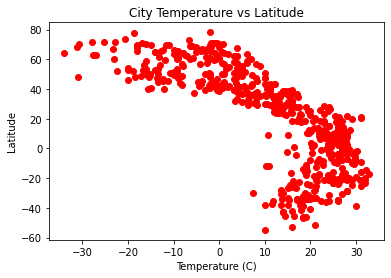

In [5]:
x_values = cities_weather_data_filtered["max_temp"]
y_values = cities_weather_data_filtered["lat"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (C)")


Text(0.5, 0, 'Humidity %')

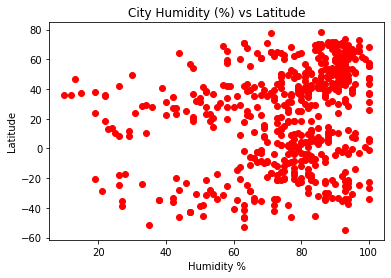

In [6]:
x_values = cities_weather_data_filtered["humidity"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Humidity (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity %")

Text(0.5, 0, 'Cloudiness')

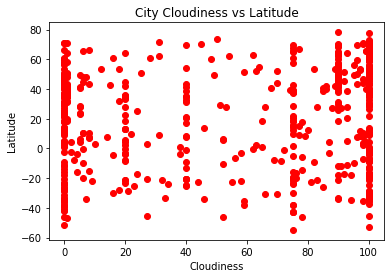

In [7]:
x_values = cities_weather_data_filtered["cloudiness"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")

Text(0.5, 0, 'Wind Speed')

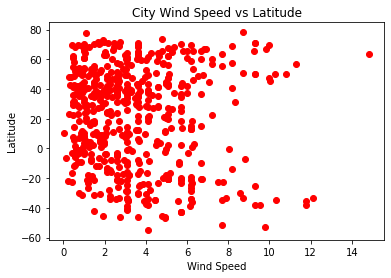

In [8]:
x_values = cities_weather_data_filtered["wind"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Wind Speed vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude
Southern Hemisphere - Temperature (F) vs. Latitude
Northern Hemisphere - Humidity (%) vs. Latitude
Southern Hemisphere - Humidity (%) vs. Latitude
Northern Hemisphere - Cloudiness (%) vs. Latitude
Southern Hemisphere - Cloudiness (%) vs. Latitude
Northern Hemisphere - Wind Speed (mph) vs. Latitude
Southern Hemisphere - Wind Speed (mph) vs. Latitude

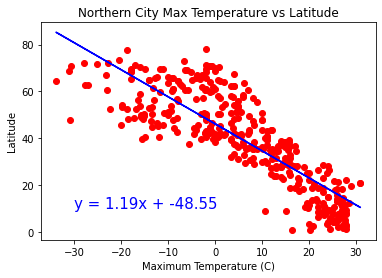

In [20]:
northern_cities = cities_weather_data_filtered[cities_weather_data_filtered['lat'] >= 0]
southern_cities = cities_weather_data_filtered[cities_weather_data_filtered['lat'] < 0]

x_values = northern_cities["max_temp"]
northern_y_values = northern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Max Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Maximum Temperature (C)")
plt.annotate(line_eq,(-30,10),fontsize=15,color="blue")

plt.plot(x_values,regress_values,"r-", color = "blue")



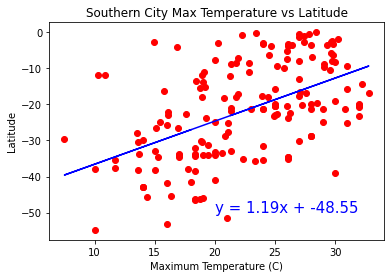

In [21]:
x_values = southern_cities["max_temp"]
southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Max Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Maximum Temperature (C)")
plt.annotate(line_eq,(20,-50),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")

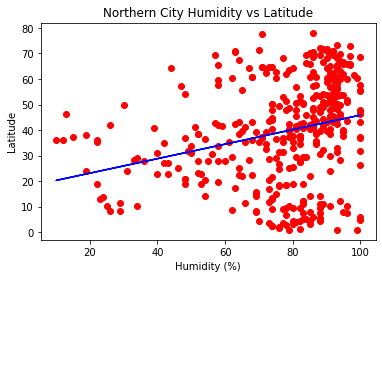

In [23]:
x_values = northern_cities["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Humidity vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.annotate(line_eq,(20,-50),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")

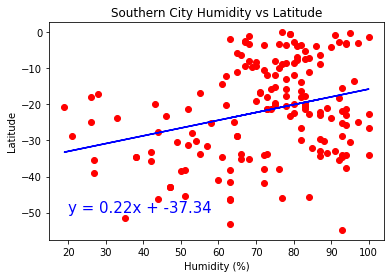

In [24]:
x_values = southern_cities["humidity"]

southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Humidity vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.annotate(line_eq,(20,-50),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")

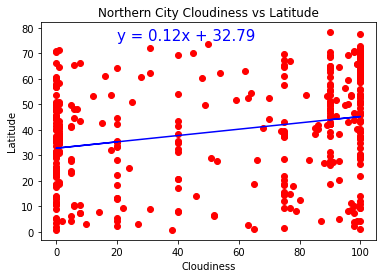

In [26]:
x_values = northern_cities["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.annotate(line_eq,(20,75),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")

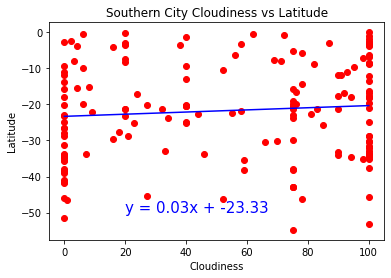

In [27]:
x_values = southern_cities["cloudiness"]

southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.annotate(line_eq,(20,-50),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")

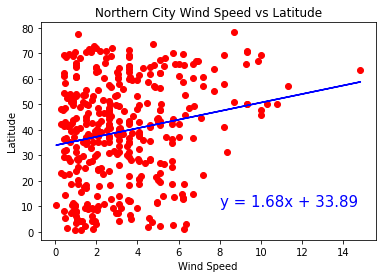

In [29]:
x_values = northern_cities["wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Wind Speed vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.annotate(line_eq,(8,10),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")

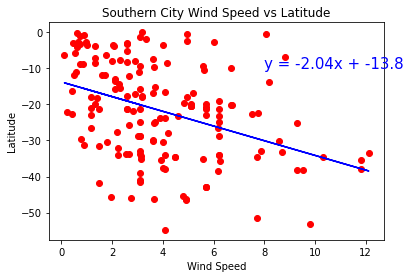

In [31]:
x_values = southern_cities["wind"]

southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Wind Speed vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.annotate(line_eq,(8,-10),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")